# Analyze EEG data

This notebook will help you prepare the figures for your EEG lab report.

![](https://media3.giphy.com/media/2seGQ9JQrHzPlNgqFY/giphy.gif?cid=ecf05e477lrmp9f3xph0dmyxg5lh5uz9vxazrpve9wtmadgs&rid=giphy.gif&ct=g)
<hr>

## Setup
Run the cell below to setup our notebook.

In [57]:
# Import our packages
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
print('Packages imported.')

Packages imported.


## Figure 1. Raw EEG recordings
After exporting your selected data as a .mat file, change the filename below.

In [10]:
# Change the filename to EXACTLY match your file
filename = 'EEG_alpha.mat'

# Load the data
from scipy.io import loadmat
data = loadmat(filename)['data'][0]
dataend = loadmat(filename)['dataend']
datastart = loadmat(filename)['datastart']

print('Data imported.')

Data imported.


Below, we'll set the sampling rate.

In [58]:
# Get the sampling rate and can create a time axis for our data
# Ensure that this matches the sampling rate of your recording!
sampling_rate = 400

import numpy as np
timestamps = (np.arange(0, len(data)) * (1.0 / sampling_rate))*1000

print('Data was sampled at', sampling_rate, 'Hz.')

Data was sampled at 400 Hz.


Now, we can plot the data!

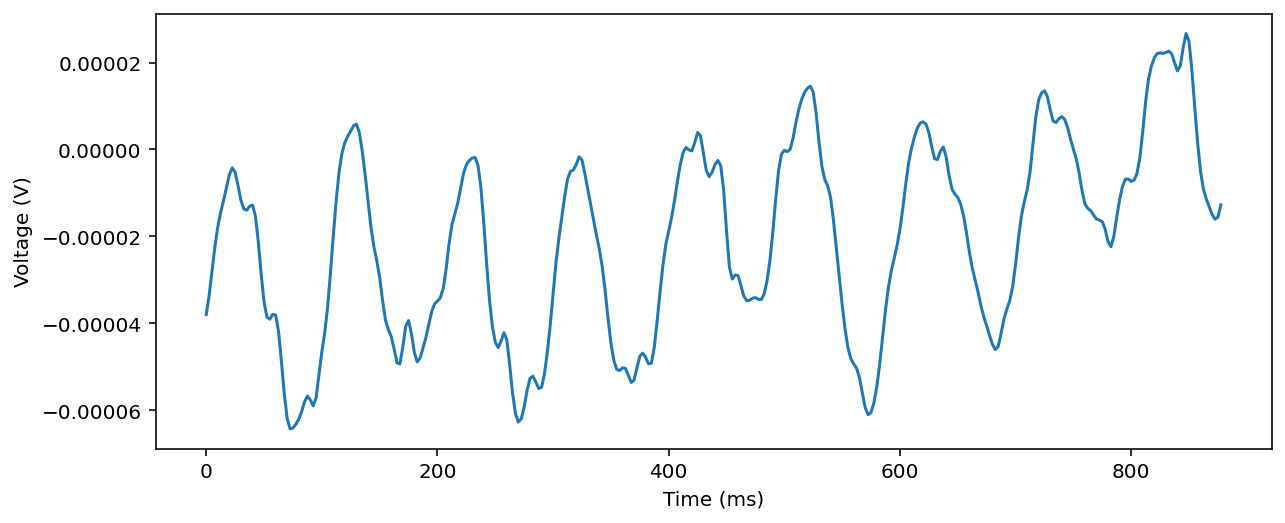

In [59]:
# set up figure & plt
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,4))

plt.plot(timestamps,data)

# You may need to change the x label
plt.xlabel('Time (ms)') 

# You may need to change the y label
plt.ylabel('Voltage (V)') 

# This makes the axis labels print without scientific notation
ax.ticklabel_format(useOffset=False, style='plain') 

# You can uncomment the line below to restrict the x axis plotting
#plt.xlim([200,700])

plt.show()

## Figure 2. Your PSD data
First, follow the instructions in the lab manual to export your PSD plot as a .txt file and upload that file to DataHub.

In [111]:
import pandas as pd

# Change the filename below to EXACTLY match your file
psd_filename = 'EEGpsd.txt'

psd_data = pd.read_fwf(psd_filename)
psd_data = psd_data.iloc[:,0].str.split('\t', expand=True).astype('float')
psd_data.columns = ['Frequency','EEG']
psd_data.head()

,Frequency,EEG
0,0.000000,2.372190e-11
1,0.390625,4.095630e-11
2,0.781250,2.518770e-11
3,1.171880,9.451400e-12
4,1.562500,1.669820e-12


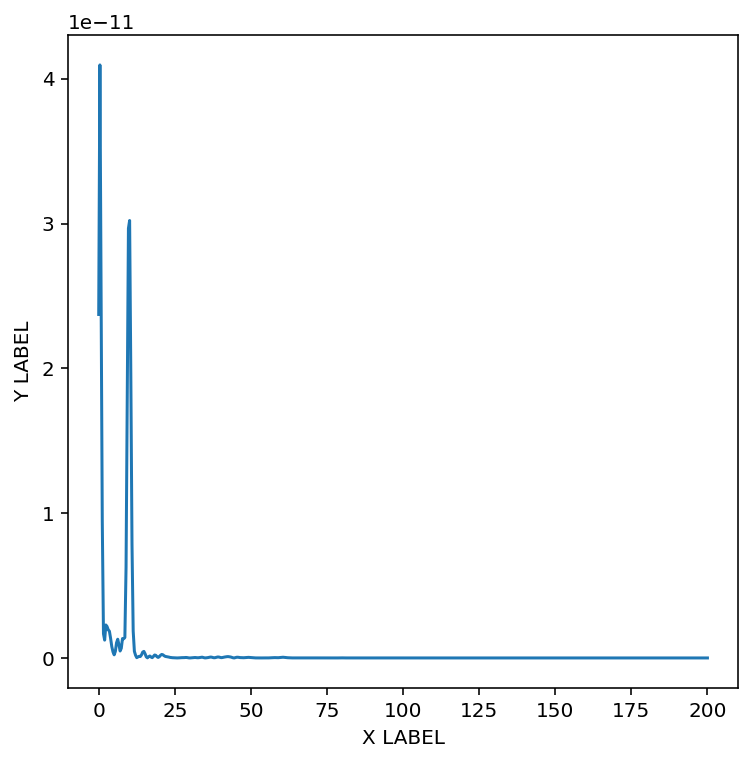

In [110]:
fig,ax = plt.subplots(figsize=(6,6))

frequency = psd_data['Frequency']
EEG = psd_data['EEG']

plt.plot(frequency,EEG)

# You may need to change the x label
plt.xlabel('X LABEL') 

# You may need to change the y label
plt.ylabel('Y LABEL') 

# This makes the axis labels print without scientific notation
#ax.ticklabel_format(useOffset=False, style='plain') 

# You can uncomment the line below to restrict the x axis plotting
#plt.xlim([200,700])

plt.show()

## Figure 3. Your spectrogram
The following code will plot your spectrogram data from LabChart. First, you need to export a spectrogram .txt file and upload it to your DataHub.

### Step 1. Load Data

In [163]:
spectrum_filename = 'EEG_rawSpectrogram.txt'

frequency_labels_df = pd.read_fwf(spectrum_filename,sep='\t',header=2)
frequency_labels = frequency_labels_df.columns.str.split('\t')
frequency_labels = frequency_labels[0][1:]

spectrum_data_df = pd.read_fwf(spectrum_filename,sep='\t',header=3)
spectrum_data_df = spectrum_data_df.iloc[:,0].str.split('\t', expand=True)
spectrum_time = list(spectrum_data_df.iloc[:,0])
spectrum_data_df = spectrum_data_df.iloc[:,1:].astype('float')
spectrum_data_df.columns = frequency_labels
spectrum_array = np.array(spectrum_data_df)
spectrum_array

array([[9.10e-13, 3.16e-11, 9.75e-11, ..., 3.27e-21, 3.75e-20, 1.75e-21],
       [1.40e-15, 2.65e-11, 1.26e-10, ..., 9.23e-21, 2.51e-20, 1.07e-21],
       [2.80e-13, 2.62e-11, 1.39e-10, ..., 1.11e-20, 2.40e-20, 4.49e-22],
       ...,
       [3.32e-11, 2.55e-09, 7.45e-11, ..., 6.88e-21, 2.04e-21, 3.37e-23],
       [5.81e-11, 2.16e-09, 1.31e-10, ..., 3.51e-20, 1.61e-20, 6.75e-21],
       [5.90e-11, 1.60e-09, 2.01e-10, ..., 1.84e-20, 2.12e-20, 4.26e-21]])

### Step 2. Clean data.
We still need to clean up the data a little bit, since the frequency labels (in the 0th row) are also in here, along with the time labels in the first column. Let's save these frequency & time labels, and then only save the necessary rows of our dataset. We should be left with an array that is just the actual data.

In [160]:
def get_sec(time_str):
    """Get seconds from time."""
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)

spectrum_time_s = []

for idx,row in enumerate(spectrum_time):
    if ':' in row:
        spectrum_time_s.append(float(get_sec(row)))
    else:
        spectrum_time_s.append(float(row))
        
recording_length = spectrum_time_s[-1] - spectrum_time_s[0]

spectrum = labchart_output[0:,1:]

print('Frequency range is ' + str(frequency_labels[0]) + ' to ' + str(frequency_labels[-1]) + ' Hz.')
print('Recording length is ' + str(recording_length) + ' seconds.') 

Frequency range is 0 to 200 Hz.
Recording length is 33.6 seconds.


### Step 3. Rotate & flip array and subselect frequencies to plot.
Next, let's rotate & flip the frequency array so that it matches our conventional spectrogram format (time on y axis, frequencies going up the x axis). We'll also subselect the frequencies we want, rather than plotting up to 200 Hz.

In [167]:
# set your max frequency below
max_frequency = 50

# round our frequency values so we can find one that matches our max frequency
freq_rounded = np.round(np.float_(frequency_labels))
freq_IDs = np.where(freq_rounded == max_frequency)

# create a new frequency axis
freq_short = freq_rounded[0:freq_IDs[0][0]]

# cut down the spectrum to only our desired frequencies
spectrum_clean = spectrum_array[:,0:freq_short.shape[0]]

# rotate the spectrum to match typical spectrogram format
spectrum_rotated = np.rot90(spectrum_clean[1:,:]) # skip the frequency row
freq_labels = np.flip(freq_short,axis=0)

print('Your data will plot with a maximum frequency of '+str(max_frequency))

Your data will plot with a maximum frequency of 50


### Step 4. Plot the data!
Depending on the power in your dataset, you may need to change the maximum power plotted on the color bar. To do so, change the variable "max_v".

In [171]:
num_ticks = 10

yticks = np.linspace(0, len(freq_labels) - 1, num_ticks, dtype=np.int)
yticklabels = [freq_labels[idx] for idx in yticks]

xticks = np.linspace(0, len(spectrum_time_s)-1, num_ticks, dtype=np.int)
xticklabels = [round(spectrum_time_s[idt],2) for idt in xticks]

# use the line below to change the heatmap scale bar
max_v = 1e-11

print('Your data will plot with a maximum V^2 of '+str(max_v))

Your data will plot with a maximum V^2 of 1e-11


Aaaaaand plot!

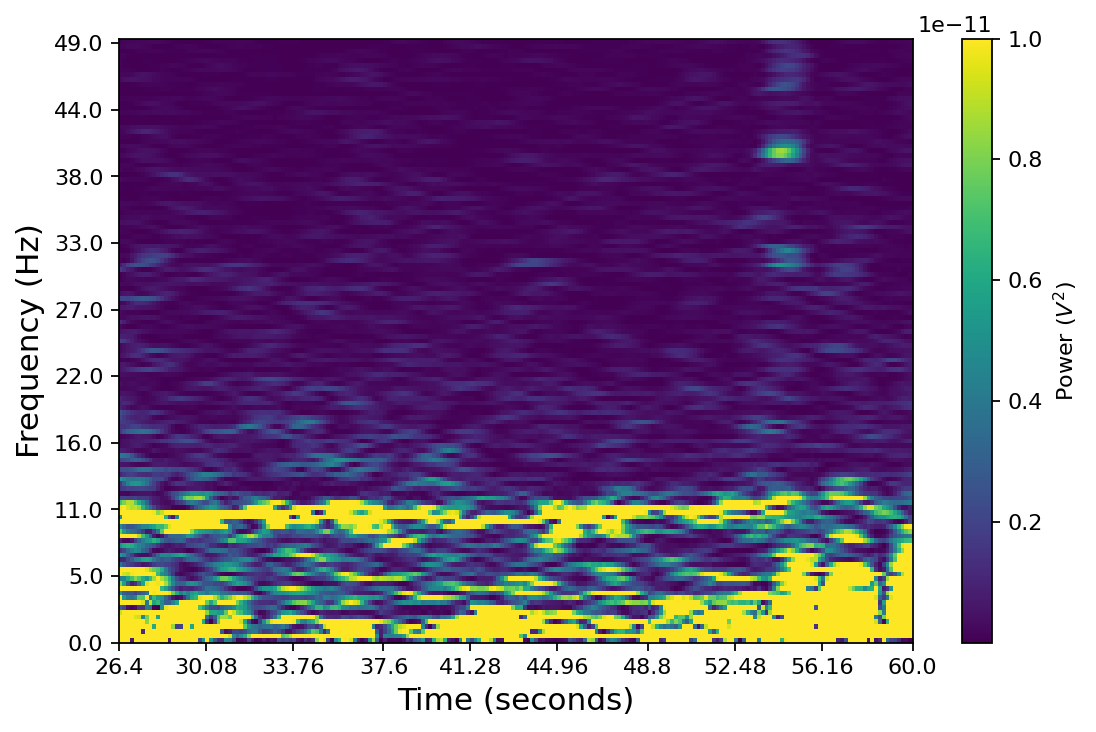

In [172]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.pcolor(np.flip(spectrum_rotated),vmax=max_v)

# Fix axes
ax.set_yticks(yticks)
ax.set_yticklabels([freq_short[idx] for idx in yticks])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

ax.set_ylabel('Frequency (Hz)',fontdict={'fontsize':14})
ax.set_xlabel('Time (seconds)',fontdict={'fontsize':14})

cbar = plt.colorbar()
cbar.ax.set_ylabel('Power ($V^2$)')


plt.show()

### Step 6. Right click on the image above to save it for your lab report.

If you want to run this code again on a different dataset, we need to clear all of the variables. Run the reset code block below to do so. It will also prompt you to make sure you want to proceed. Type y and press enter.

In [45]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
